# 4TIN811U Machine Learning & Deep Learning
# TP 2 - Régression locale

In [27]:
# Cette option peut être décommentée pour améliorer la visualisation
# des figures, mais ne fonctionne pas sur tous les systèmes.
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# 1. Régression locale

Dans cette première partie, nous allons prédire [le prix des logements à Perth](https://www.kaggle.com/datasets/syuzai/perth-house-prices) en utilisant une régression locale à partir de deux informations : leur surface et leur distance au centre-ville.
Le dataset <code>dataset_tp2_houses.npy</code> est disponible dans le fichier <code>tp2.zip</code> sur Moodle et contient 1000 données d'entraînement.

In [28]:
house_prices = np.load("dataset_tp2_houses.npy") # 1000 données, trois colonnes : surface, distance du centre-ville, prix
print(np.shape(house_prices))
print(house_prices)

surfaces = house_prices[:,0]
distances = house_prices[:,1]
prices = house_prices[:,2]

(1000, 3)
[[    178   27400 1175000]
 [    227   38200  338000]
 [    137   18100  335000]
 ...
 [    236   29000  892500]
 [    114    2600 1030000]
 [     91   13400  316000]]


Affichez le graphique en 3D du prix des logements en fonction de leur surface et de leur distance au centre-ville.

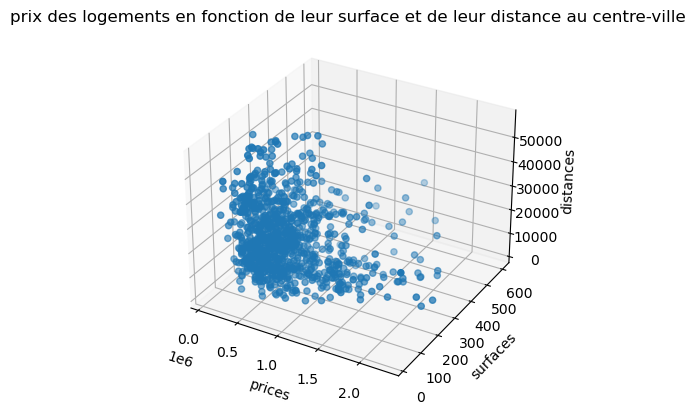

In [29]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(prices, surfaces, distances)
ax.set_xlabel('prices')
ax.set_ylabel('surfaces')
ax.set_zlabel('distances')
ax.set_title('prix des logements en fonction de leur surface et de leur distance au centre-ville')
plt.show()

Implémentez la fonction de poids $w^{(i)}$ vue au cours, qui donne un poids à un élément $x^{(i)}$ des données d'entraînement en fonction d'un $x$ fixé et de l'hyperparamètre de bande passante $\tau$.

In [31]:
def weight(x, xi, tau):
    """Returns the weight to give xi from the training set
       with respect to a point x and with bandwidth tau."""
    return np.exp(-(np.abs(xi-x)**2/(2*tau**2)))

In [32]:
def weight_vector(x, X, tau):
    """Returns the vector of weights for each element of vector X
       with respect to a point x and with bandwidth tau."""
    return np.exp(-(np.abs(X-x)**2/(2*tau**2)))

Pour un x fixé (par exemple, 20000), affichez dans un graphique les poids des différents éléments de la feature "distance au centre-ville". Essayez différentes valeurs de bande passante. Qu'observez-vous ? Qu'en est-il si vous passez à la feature "surface" ?

*Réponse :*
Plus la bande passante, tau est grand, plus la courbe de gausse va etre etendu. Plus tau est petit plus la courbe va etre rapproché.
Il y a  un ordre de grand de 100 entre surface et distance

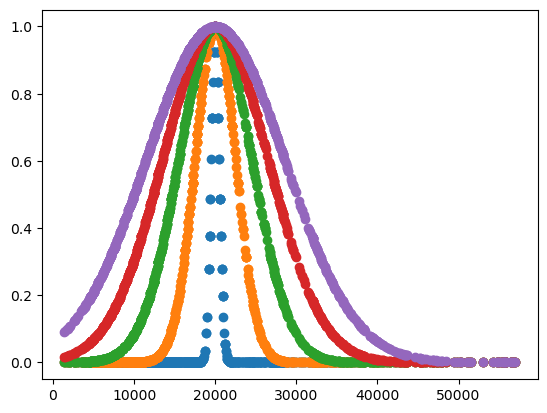

In [57]:
# Graphique pour la feature "distance au centre-ville"

for tau in range(500,10000,2000):
    wi=weight_vector(20000, distances,tau)
    plt.plot(distances,wi ,'o', label=f'Tau = {tau}')


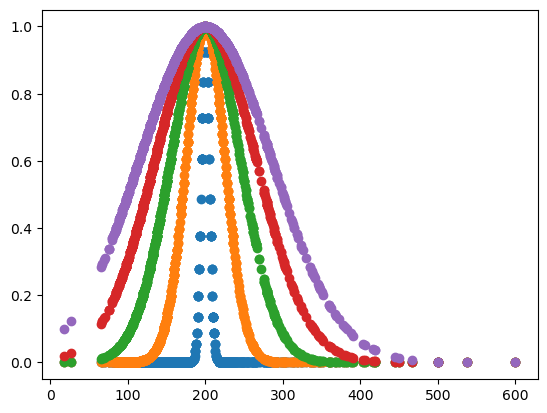

In [58]:
# Graphique pour la feature "surface"
for tau in range(5,100,20):
    wi=weight_vector(200, surfaces,tau)
    plt.plot(surfaces,wi ,'o', label=f'Tau = {tau}')

### 1.1. Régression locale à une caractéristique

Dans cette première partie, on souhaite estimer le prix d'un logement à Perth en prenant *uniquement en compte la distance au centre-ville* (pour simplifier les calculs, on ignore pour le moment la surface). Effectuez un pré-traitement pour récupérer le $X$ et le $Y$ adaptés à partir de la variable <code>house_prices</code>. N'oubliez pas de prendre en compte le paramètre $\theta_0$ !

In [74]:
m = surfaces.shape[0]

Y = prices.reshape((m, 1))

theta0 = np.ones((m, 1))
X = np.concatenate((surfaces.reshape((m, 1)), theta0), axis=1)

In [73]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000, 1)


Pour chaque $x$, calculez le vecteur $\theta$ minimisant la fonction d'erreur $J'_x(\theta)$ vue au cours pour la régression locale. Utilisez votre méthode favorite parmi celles vues au cours (ou utilisez les deux et comparez les résultats !).

In [ ]:
def squared_error(Theta,X,Y):
    
def gradient_square_error(Theta, X, Y):
    
def linear_regression_gradient_descent(X, Y, nb_steps, learning_rate = .01):

Affichez les prédictions données par votre fonction.

In [ ]:
pass

### 1.2. Régression locale à plusieurs caractéristiques

En utilisant les mêmes fonctions, faites fonctionner votre méthode en prenant cette fois en compte les deux features "surface" et "distance du centre-ville". Affichez vos résultats sur un graphique en trois dimensions.

In [ ]:
pass

En fonction de votre choix de bande passante $\tau$, il est probable que selon une des deux dimensions, les prédictions soient linéaires. À quoi cela peut-il être dû ?

*Réponse :*

Pour remédier à cela, il peut être utile de *normaliser* les données.
Ré-appliquez vos fonctions en vous assurant que les éléments de $X$ ont la même magnitude selon chaque dimension.

In [ ]:
pass

Généralisez vos fonctions afin de pouvoir facilement changer la fonction de poids utilisée.
Utilisez la fonction de poids $w^{(i)} = 1$ et commentez le résultat.

In [ ]:
pass

## 2. Méthode de Newton

On considère la fonction $$f(x) = x^4 + 3x^3 - 6x^2 + 4x + 12.$$

En utilisant la méthode de Newton (à une dimension), calculez
* ses racines,
* son minimum global.

Utilisez la même fonction <code>newton_1d</code> (avec des arguments différents) pour les deux tâches données.
Aidez-vous du graphe de $f$.

In [ ]:
def f(x):
    return x**4 + 3 * x**3 - 6 * x**2 + 4 * x + 12

def df(x):
    """Computes the derivative of f at point x."""
    pass

def ddf(x):
    """Computes the second derivative of f at point x."""
    pass

In [ ]:
# Graphe de f entre -5 et 5
pass

In [ ]:
def newton_1d(f, df, x0, max_iter=1000, epsilon=1e-10):
    """Finds a root of f given its derivative df and an initial guess x0.
       Assumes that a value x is a root if abs(f(x)) < epsilon.
       Raises an exception if no such value is found within max_iter iterations."""
    pass

In [ ]:
# Find the two roots and the global minimum using newton_1d
pass

## 3. Régression logistique
Dans cette partie, on souhaite prédire [la qualité de pommes](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data) en utilisant une régression logistique à partir de deux informations : leur taille et leur *sweetness*. Le deux features sont des réels (déjà normalisés) et la qualité est un entier dans $\{0, 1\}$ : $1$ pour les bonnes pommes et $0$ pour les mauvaises pommes.
Le dataset <code>dataset_tp2_apples.npy</code> est disponible dans le fichier <code>tp2.zip</code> sur Moodle et contient 1000 données d'entraînement.

In [ ]:
# 1000 données, trois colonnes : taille, sweetness et qualité
apple_quality = np.load("dataset_tp2_apples.npy", allow_pickle=True)
print(np.shape(apple_quality))
print(apple_quality)

size = apple_quality[:,0]
sweetness = apple_quality[:,1]
quality = apple_quality[:,2]

Affichez un graphique en 2D (une dimension par feature) reprenant les différentes données, en utilisant des symboles différents pour les bonnes et les mauvaises pommes.

In [ ]:
pass

Nous avons vu au cours que la fonction de log-vraisemblance pour la régression logistique est la suivante:
$$\ell(\theta) = \sum_{i = 1}^m y^{(i)}\log h_\theta(x^{(i)}) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})),$$
où $h_\theta(x^{(i)}) = \frac{1}{1 + e^{-\theta^{T}x^{(i)}}}$.

Nous avons aussi vu que les dérivées partielles de $\ell$ sont
$$\frac{\partial}{\partial\theta_j}\ell(\theta) = \sum_{i=1}^m (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}.$$

On peut donc calculer les entrées de la matrice hessienne: pour $0 \le j, k \le n$, l'élément en position $(j, k)$ est donné par
$$
\begin{align}
H_{jk}(\theta) &= \frac{\partial^2}{\partial\theta_j\partial\theta_k} \ell(\theta) \\
       &= \sum_{i = 1}^m -\frac{\partial}{\partial\theta_j}h_\theta(x^{(i)})x^{(i)}_k \\
       &= -\sum_{i = 1}^m h_\theta(x^{(i)})(1 - h_\theta(x^{(i)}))x^{(i)}_j x^{(i)}_k.
\end{align}
$$
(Assurez-vous de pouvoir suivre les calculs !)

*Remarque* : Nous avons déclaré au cours (sans preuve) que $\ell$ est concave, et a donc un seul maximum local, qui est de plus global. Cela peut en fait se prouver en analysant les propriétés de la matrice hessienne: celle-ci est *semi-définie négative* pour tout $\theta$, c'est-à-dire, pour tout $z\in\mathbb{R}^{n+1}$, $z^TH(\theta)z \le 0$. Cela peut se vérifier (exercice !) avec la définition ci-dessus.
Cette propriété est la généralisation multi-dimensionnelle de la propriété "pour $f\colon \mathbb{R} \to \mathbb{R}$, $f$ est concave si $f'' < 0$".

Implémentez des fonctions qui calculent $h_\theta$, le gradient de $\ell$ et la matrice hessienne de $\ell$. Notez que la matrice hessienne ne dépend plus de $Y$ !

In [ ]:
def h(xi, theta):
    pass

def gradient_l(X, Y, theta):
    pass

def hessian_l(X, theta):
    pass

Utilisez la matrice hessienne et la méthode de Newton (multi-dimensionnelle cette fois) pour trouver les valeurs $\theta = (\theta_0, \theta_1, \theta_2)$ maximisant la vraisemblance.

In [ ]:
def newton_multidim(f, df, theta_0, max_iter=1000, epsilon=1e-6):
    """Finds a root of multivariate function f given its gradient df and an initial guess theta_0.
       Assumes that a value theta is a root if np.linalg.norm(f(theta)) < epsilon.
       Raises an exception if no such value is found within max_iter iterations."""
    pass

Ajoutez à votre graphique précédent la frontière de décision (qui est la droite telle que $\theta^Tx = 0$ pour le vecteur $\theta$ à trouver, qui correspond à la droite des points $x$ donnant la valeur $\frac{1}{2}$ à la fonction sigmoïde) donnée par la régression logistique.

In [ ]:
pass